In [1]:
# import all libraries

import pandas as pd
import numpy as np


# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")   

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

# For time stamps
from datetime import datetime

from scipy.stats import norm, skew #for some statistics
from scipy import stats #qqplot
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.graphics.tsaplots as sgt
from sklearn.preprocessing import StandardScaler
# ARMA
from statsmodels.tsa.arima_model import ARMA
# ARIMA
from statsmodels.tsa.arima.model import ARIMA


import pmdarima as pm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# import ensemble models

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# import xgboost
from xgboost import XGBRegressor

# import lightgbm
from lightgbm import LGBMRegressor

from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score


In [2]:
# read train test 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
data= train.copy()
data.head()

,id,Date,Open,Close,Volume,Strategy
0,0,2015-06-01,66.208486,75.609978,298506300,Hold
1,1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2,2015-06-15,47.701942,71.140831,250670900,Buy
3,3,2015-06-22,54.754816,72.881344,223614300,Hold
4,4,2015-06-29,48.031899,66.284718,406814900,Buy


# STATIONARY CLOSE VALUES

In [4]:
# take close first order differencing

data['Close_diff']=data['Close'].diff()
# replace Nan with 0
data['Close_diff'].fillna(0,inplace=True)
data.head()


,id,Date,Open,Close,Volume,Strategy,Close_diff
0,0,2015-06-01,66.208486,75.609978,298506300,Hold,0.000000
1,1,2015-06-08,64.116235,74.443331,227974800,Hold,-1.166647
2,2,2015-06-15,47.701942,71.140831,250670900,Buy,-3.302500
3,3,2015-06-22,54.754816,72.881344,223614300,Hold,1.740512
4,4,2015-06-29,48.031899,66.284718,406814900,Buy,-6.596626


In [5]:
def smape_kun(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def temporal_metrics(y_pred,y_true):
    print("Mean Absolute Error: ",mean_absolute_error(y_true,y_pred))
    print("Mean Squared Error: ",mean_squared_error(y_true,y_pred))
    print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_true,y_pred)))
    print("Smape", smape_kun(y_true,y_pred))

def regression_metrics(y_pred,y_true):
    print("Mean Absolute Error: ",mean_absolute_error(y_true,y_pred))
    print("Mean Squared Error: ",mean_squared_error(y_true,y_pred))
    print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_true,y_pred)))
    print("R2 Score: ",r2_score(y_true,y_pred))

def classification_metrics(y_pred,y_true):
    print("Accuracy: ",accuracy_score(y_true,y_pred))
    print("Precision: ",precision_score(y_true,y_pred, average='macro'))
    print("Recall: ",recall_score(y_true,y_pred, average='macro'))
    print("F1 Score: ",f1_score(y_true,y_pred, average='macro'))
    print("Confusion Matrix: \n",confusion_matrix(y_true,y_pred))

def train_ARIMA(data,order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    aic = model_fit.aic
    return aic


def find_best_pdq(p_val,d_val,q_val,data):
        
    # Define the range of values for p, d, and q
    p_values = range(0, p_val)  # Replace with an appropriate range
    d_values = range(0, d_val)  # Replace with an appropriate range
    q_values = range(0, q_val)  # Replace with an appropriate range

    # Initialize variables to store best model and criterion value
    best_aic = float("inf")
    best_order=[0,0,0]

    # Perform a grid search to find the best ARIMA model
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = [p, d, q]
                try:
                    aic = train_ARIMA(data,order)
                    if aic < best_aic:
                        best_aic = aic
                        best_order = order
                except:
                    print(p,d,q)
                    continue

    # Print the best model and order
    print("Best AIC: {:.2f}".format(best_aic))
    print("Best ARIMA Order (p, d, q):", best_order)
    return best_order

    



In [6]:
# find_best_pdq(10,1,10,data['Close_diff'])

# using stationary points

In [7]:
X=data['Close']
Y=data['Close_diff']

train_size = int(0.8 * len(data))  # Adjust the split ratio as needed

# Split the data into training and testing sets based on the cutoff index
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]

# print shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240,)
(60,)
(240,)
(60,)


# Arima

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# 20,0,15

arima_model = ARIMA(y_train, order=(5,1,5))
# p,d,q
arima_model_fit = arima_model.fit()

c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
forecast= arima_model_fit.forecast(steps=len(y_test))

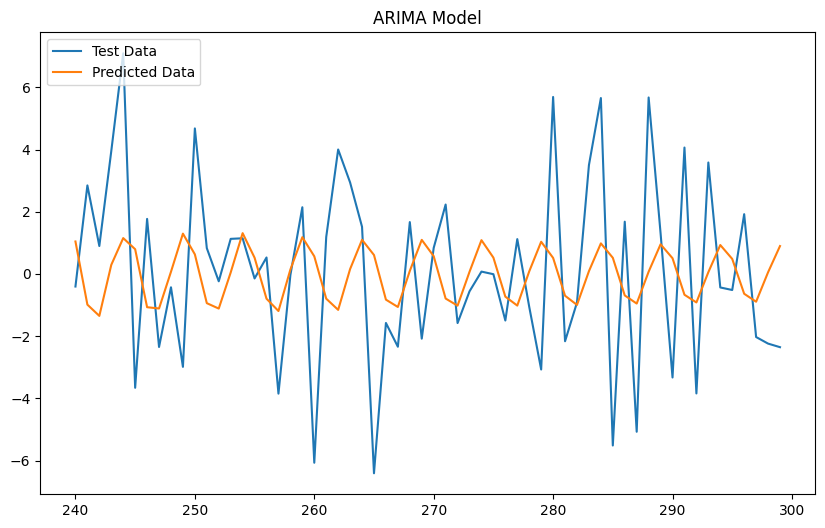

In [10]:
# plot 

plt.figure(figsize=(10,6))
plt.plot(y_test)

plt.plot(forecast)

plt.legend(['Test Data','Predicted Data'], loc='upper left')
plt.title('ARIMA Model')

plt.show()

In [11]:
# convert forecast back to close price

forecast=forecast+X_train.iloc[-1]
forecast

# convert close diff back to close price

y_test_close=y_test+X_train.iloc[-1]

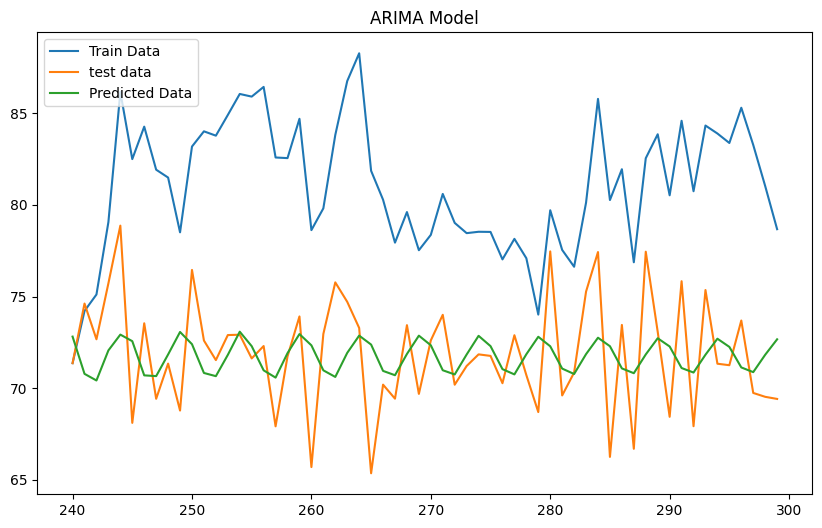

In [12]:
# plot

plt.figure(figsize=(10,6))
plt.plot(X_test)
plt.plot(y_test_close)

plt.plot(forecast)

plt.legend([
    'Train Data',
    'test data','Predicted Data'], loc='upper left')

plt.title('ARIMA Model')

plt.show()

In [13]:
print(arima_model_fit.aic)
temporal_metrics(forecast,X_test)

1265.0402442106079
Mean Absolute Error:  9.35518200237322
Mean Squared Error:  99.24913830265928
Root Mean Squared Error:  9.96238617514194
Smape 0.060760243642395975


# SARIMAX

In [14]:
# SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(y_train, order=(5,1,5), seasonal_order=(1, 0, 1, 52))

sarima_model_fit = sarima_model.fit()



c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:

forecast= sarima_model_fit.forecast(steps=len(y_test))

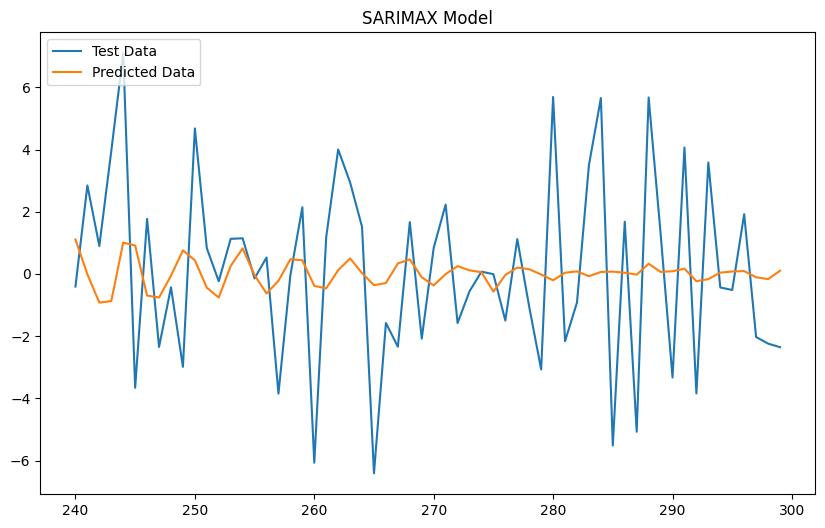

In [16]:
# plot

plt.figure(figsize=(10,6))
plt.plot(y_test)

plt.plot(forecast)

plt.legend(['Test Data','Predicted Data'], loc='upper left')
plt.title('SARIMAX Model')

plt.show()


In [17]:
# convert forecast back to close price

forecast=forecast+X_train.iloc[-1]
forecast

# convert close diff back to close price

y_test_close=y_test+X_train.iloc[-1]

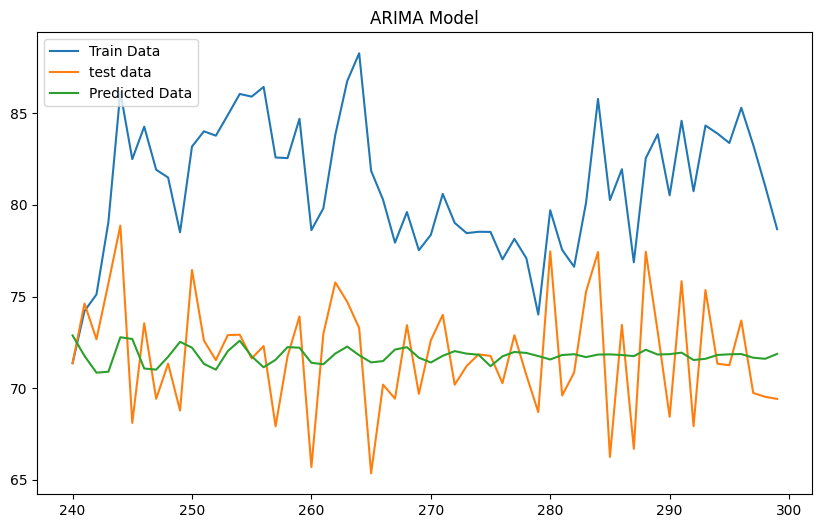

In [18]:
# plot

plt.figure(figsize=(10,6))
plt.plot(X_test)
plt.plot(y_test_close)

plt.plot(forecast)

plt.legend([
    'Train Data',
    'test data','Predicted Data'], loc='upper left')

plt.title('ARIMA Model')

plt.show()

In [19]:
print(sarima_model_fit.aic)
temporal_metrics(forecast,X_test)

1272.4601367652554
Mean Absolute Error:  9.330261916965258
Mean Squared Error:  98.71770965075703
Root Mean Squared Error:  9.935678620545103
Smape 0.06056321158420535


# USING EXOG Values with stationary points

In [41]:
# X and Y

X=data[['Open','Volume','Close']]

Y=data['Close_diff']

# split temporal data

train_size = int(0.8 * len(X))  # Adjust the split ratio as needed

# Split the data into training and testing sets based on the cutoff index
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]

# print shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 3)
(60, 3)
(240,)
(60,)


# ARIMA

In [42]:
exog = X_train[['Open', 'Volume']]

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# 20,0,15
arima_model = ARIMA(y_train,exog=exog, order=(5,1,5))
# p,d,q
arima_model_fit = arima_model.fit()

c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
test_exog = X_test[['Open','Volume']]
forecast= arima_model_fit.forecast(steps=len(y_test),exog=test_exog)

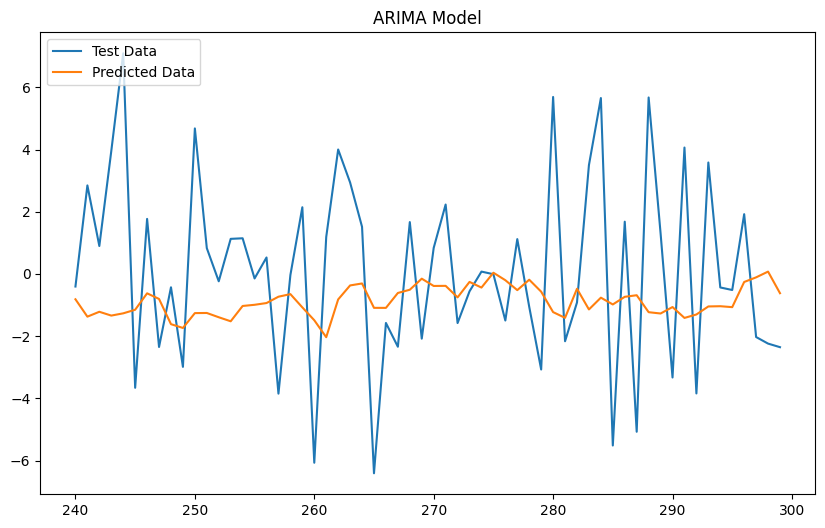

In [45]:
# plot 

plt.figure(figsize=(10,6))
plt.plot(y_test)

plt.plot(forecast)

plt.legend(['Test Data','Predicted Data'], loc='upper left')
plt.title('ARIMA Model')

plt.show()

In [48]:
X_train['Close'].iloc[-1]

71.7707813032523

In [49]:
# convert forecast back to close price

forecast=forecast+X_train['Close'].iloc[-1]
forecast

# convert close diff back to close price

y_test_close=y_test+X_train['Close'].iloc[-1]

In [50]:
forecast

240    70.955947
241    70.397389
242    70.554163
243    70.431825
244    70.504140
245    70.619151
246    71.147876
247    70.966736
248    70.156156
249    70.033800
250    70.511585
251    70.515890
252    70.378454
253    70.248596
254    70.740813
255    70.778759
256    70.835049
257    71.039050
258    71.121885
259    70.695569
260    70.282338
261    69.736749
262    70.951303
263    71.401262
264    71.464764
265    70.680726
266    70.679660
267    71.159005
268    71.262981
269    71.618676
270    71.384288
271    71.387973
272    71.017185
273    71.514517
274    71.332778
275    71.809838
276    71.569408
277    71.250118
278    71.585276
279    71.200535
280    70.543529
281    70.359483
282    71.294038
283    70.629023
284    71.008214
285    70.789726
286    71.035442
287    71.086273
288    70.540720
289    70.498819
290    70.706482
291    70.356580
292    70.467536
293    70.725656
294    70.733123
295    70.703139
296    71.512394
297    71.661122
298    71.8459

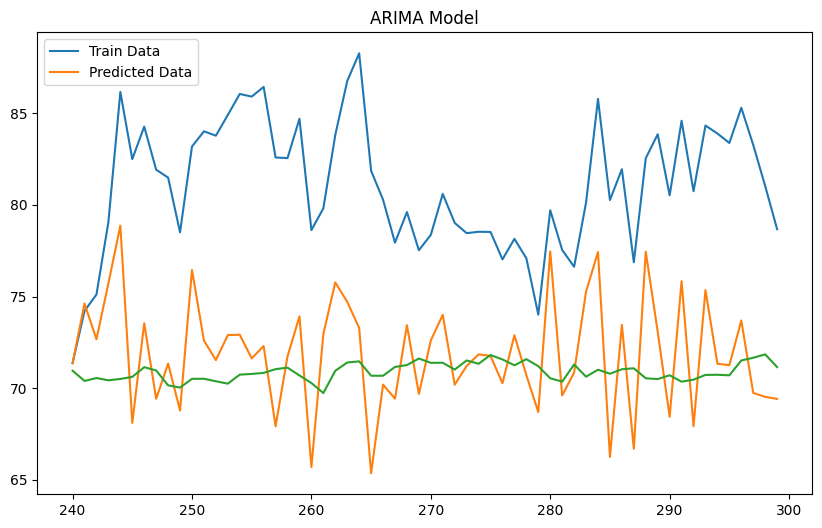

In [51]:
# plot

plt.figure(figsize=(10,6))
plt.plot(X_test['Close'])
plt.plot(y_test_close)

plt.plot(forecast)

plt.legend([
    'Train Data',
    'test data',
    'Predicted Data'], loc='upper left')

plt.title('ARIMA Model')

plt.show()

In [53]:
print(arima_model_fit.aic)
temporal_metrics(forecast,X_test['Close'])

1544.9132199988687
Mean Absolute Error:  10.170128994608264
Mean Squared Error:  116.58490047384294
Root Mean Squared Error:  10.797448794684925
Smape 0.06642558534045133


# SARIMAX

In [54]:
exog = X_train[['Open', 'Volume']]

In [55]:
# SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(y_train, order=(5,1,5),exog=exog, seasonal_order=(1, 1, 1, 52))

sarima_model_fit = sarima_model.fit()



c:\Users\shrey\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
test_exog = X_test[['Open','Volume']]
forecast= sarima_model_fit.forecast(steps=len(y_test),exog=test_exog)

In [ ]:
# plot 

plt.figure(figsize=(10,6))
plt.plot(y_test)

plt.plot(forecast)

plt.legend(['Test Data','Predicted Data'], loc='upper left')
plt.title('ARIMA Model')

plt.show()

In [57]:
# convert forecast back to close price

forecast=forecast+X_train['Close'].iloc[-1]
forecast

# convert close diff back to close price

y_test_close=y_test+X_train['Close'].iloc[-1]

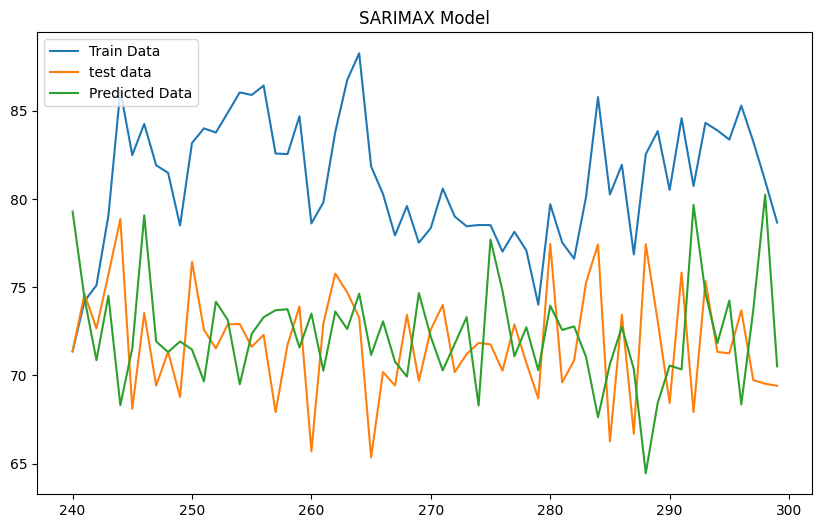

In [58]:
# plot

plt.figure(figsize=(10,6))
plt.plot(X_test['Close'])
plt.plot(y_test_close)

plt.plot(forecast)

plt.legend([
    'Train Data',
    'test data',
    'Predicted Data'], loc='upper left')

plt.title('SARIMAX Model')

plt.show()

In [59]:
print(sarima_model_fit.aic)
temporal_metrics(forecast,X_test['Close'])

1254.1592999366599
Mean Absolute Error:  8.9754275894589
Mean Squared Error:  100.37591595030763
Root Mean Squared Error:  10.018778166538453
Smape 0.058394684407970465
